In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score


In [67]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "FM3Long", "fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,FM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


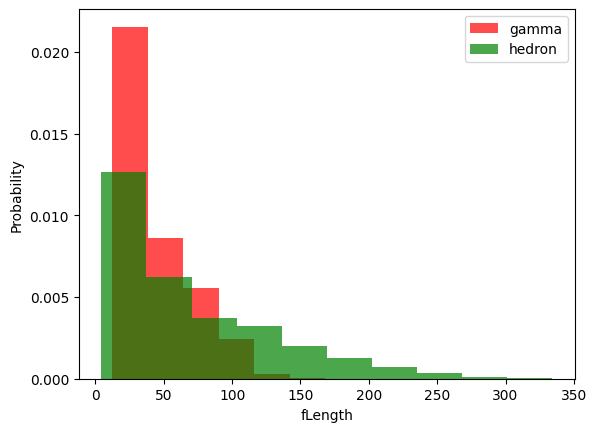

In [68]:
df["class"] = (df["class"]=='g').astype(int)
plt.hist(df[df["class"]==1]["fLength"],color='red',label='gamma',alpha=0.7,density=True)
plt.hist(df[df["class"]==0]["fLength"],color='green',label='hedron',alpha=0.7,density=True)
plt.xlabel("fLength")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [69]:
def data_mod(df,oversample=False):
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    ROS = RandomOverSampler()
    x,y = ROS.fit_resample(x,y)
    data = np.hstack((x,np.reshape(y,(-1,1))))
    return data, x, y

In [70]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])


/Users/pavan/Code/ml/ml/ml_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [71]:
train, x_train, y_train = data_mod(train,oversample=True)
valid, x_valid, y_valid = data_mod(valid,oversample=True)
test, x_test, y_test = data_mod(test,oversample=True)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

knn_model = KNeighborsClassifier()
knn_model = knn_model.fit(x_train,y_train)
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)
sv_model = SVC()
sv_model = sv_model.fit(x_train,y_train)


In [65]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [114]:
nn_model = keras.Sequential()
nn_model.add(keras.Input(shape=(10,)))
nn_model.add(layers.Dense(32,activation='relu',name="layer1"))
nn_model.add(layers.Dense(32,activation='relu',name='layer2'))
nn_model.add(layers.Dense(1,activation='sigmoid',name='output_layer'))
nn_model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')
print("length of the model "+str(len(nn_model.layers)))
nn_model.summary()


length of the model 3


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,441 (5.63 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
history = nn_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.7274 - loss: 0.5408 - val_accuracy: 0.6607 - val_loss: 0.6105
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.8314 - loss: 0.3827 - val_accuracy: 0.6840 - val_loss: 0.5515
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.8449 - loss: 0.3618 - val_accuracy: 0.7346 - val_loss: 0.5109
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8517 - loss: 0.3524 - val_accuracy: 0.7096 - val_loss: 0.5624
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.8593 - loss: 0.3369 - val_accuracy: 0.7464 - val_loss: 0.4830
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.8641 - loss: 0.3274 - val_accuracy: 0.7231 - val_loss: 0.5124
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8674 - loss: 0.3137 - val_accuracy: 0.7464 - val_loss: 0.4694
Epoch 8/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.8672 - loss: 0

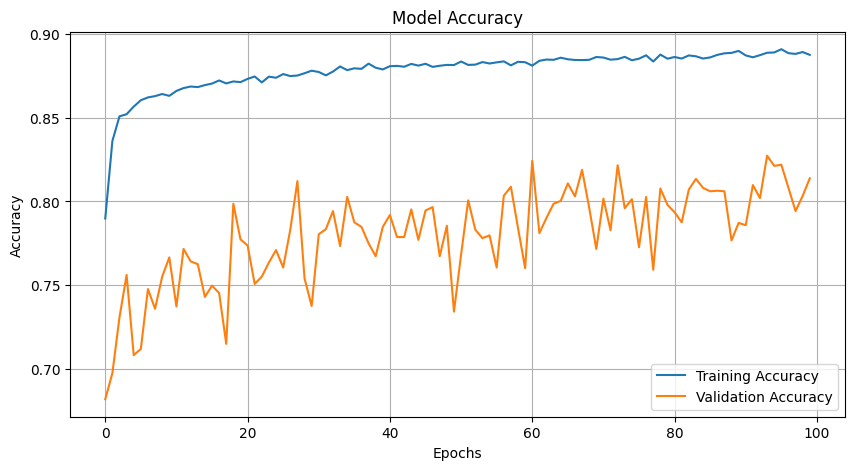

In [110]:
plt.figure(figsize=(10,5))
plt.plot(nn_model.history['accuracy'], label='Training Accuracy')

if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show


In [121]:
accuracies = []
losses = []
models = [knn_model , nb_model, lg_model, sv_model]
y_pred = nn_model.predict(x_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)
acuuracy = accuracy_score(y_test,y_pred)
accuracies.append(acuuracy)
print(nn_model)
print(classification_report(y_test,y_pred))
for model in models[:]:
    print(model)
    y_pred = model.predict(x_test)
    acuuracy = accuracy_score(y_test,y_pred)
    accuracies.append(acuuracy)
    print(classification_report(y_test,y_pred))


152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step
<Sequential name=sequential_17, built=True>
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      2428
           1       0.81      0.90      0.85      2428

    accuracy                           0.85      4856
   macro avg       0.85      0.85      0.85      4856
weighted avg       0.85      0.85      0.85      4856

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.85      0.73      0.78      2428
           1       0.76      0.87      0.81      2428

    accuracy                           0.80      4856
   macro avg       0.80      0.80      0.80      4856
weighted avg       0.80      0.80      0.80      4856

GaussianNB()
              precision    recall  f1-score   support

           0       0.80      0.41      0.54      2428
           1       0.60      0.90      0.72      2428

    accuracy                           0.65      4856
   ma

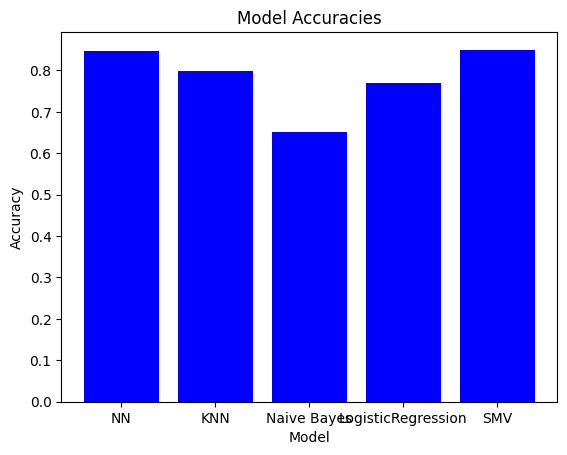

In [127]:
plt.bar(["NN","KNN", "Naive Bayes","LogisticRegression","SMV"],accuracies,color='blue')
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()